# MeanShift Clustering sample (Non Hierarchical Clustering)

- No need to specify number of clusters.
- Assuming multiple Gaussian distributions, cluster analysis is performed by determining which Gaussian distribution each data belongs to.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster
from sklearn import preprocessing

In [2]:
"""Prepare Dataset.
Wine classification open source dataset
- UCI: https://archive.ics.uci.edu/ml/datasets/wine
"""
df_wine_classification = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None
)

df_wine = df_wine_classification[
    [0, 10, 13]
]
df_wine.columns = [
    '1) Alcohol',
    '10)Color intensity',
    '13)Proline'
]

pd.DataFrame(df_wine)

,1) Alcohol,10)Color intensity,13)Proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


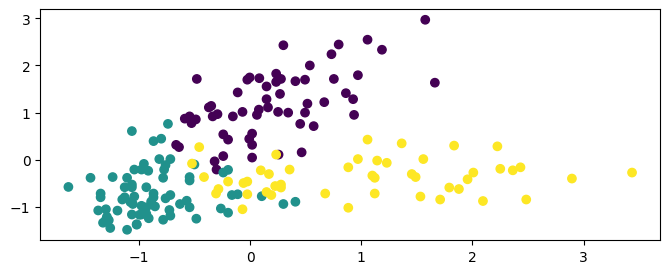

In [3]:
"""Standardize and visualize.
"""
X = df_wine[
    ['10)Color intensity', '13)Proline']
]

sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
z = df_wine['1) Alcohol']

plt.figure(figsize=(8, 3))
plt.scatter(x, y, c=z)
plt.show()

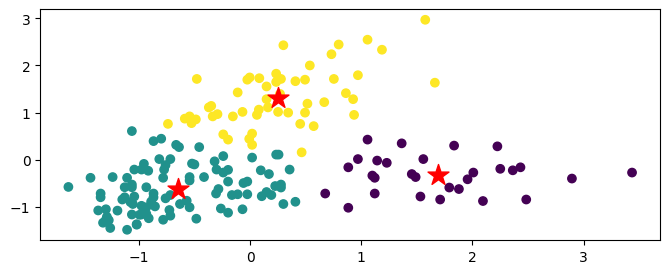

In [4]:
"""KMeans Clustering (for comparison with MeanShift Clustering)
"""
km = cluster.KMeans(
    n_clusters=3,
    n_init=10
)
z_km = km.fit(X_norm)

plt.figure(figsize=(8, 3))
plt.scatter(
    x, 
    y, 
    c=z_km.labels_
)
plt.scatter(
    z_km.cluster_centers_[:, 0],
    z_km.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red'
)    
plt.show()